In [1]:
# Import packages
import numpy as np
import time 
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
#import math
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix

from pandas import concat
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance

In [2]:
import datetime
from datetime import datetime
from datetime import timedelta

The standard data loading, cleaning and missing values filling steps are below, followed by data exploration.

In [3]:
#used as temporary solution - if there's time must fill missing values in a more meaningful way
df = pd.read_csv('data.csv').fillna(method='ffill')
df.head(15)

# add drop dups
df.drop_duplicates(keep=False,inplace=True) 

,Date,P,D,E,CPI,Fraction,GS10,Price,Dividend,Earnings
0,"1871,01","4,44","0,26","0,40","12,46","1871,04","5,32","91,37","5,35","8,23"
1,"1871,02","4,50","0,26","0,40","12,84","1871,13","5,32","89,86","5,19","7,99"
2,"1871,03","4,61","0,26","0,40","13,03","1871,21","5,33","90,71","5,12","7,87"
3,"1871,04","4,74","0,26","0,40","12,56","1871,29","5,33","96,81","5,31","8,17"
4,"1871,05","4,86","0,26","0,40","12,27","1871,37","5,33","101,57","5,43","8,36"
5,"1871,06","4,82","0,26","0,40","12,08","1871,46","5,34","102,32","5,52","8,49"
6,"1871,07","4,73","0,26","0,40","12,08","1871,54","5,34","100,41","5,52","8,49"
7,"1871,08","4,79","0,26","0,40","11,89","1871,62","5,34","103,31","5,61","8,63"
8,"1871,09","4,84","0,26","0,40","12,18","1871,71","5,35","101,94","5,48","8,42"
9,"1871,1","4,59","0,26","0,40","12,37","1871,79","5,35","95,19","5,39","8,30"


In [4]:
def parse_date2(date):
    if date.endswith(",1"):
        date += "0"
    return datetime.strptime(date, "%Y,%m")

In [5]:
"""def parse_date(date):
    year, month = date.split(",", maxsplit=1)
    if month == "1":
        month = "10"
    return datetime(int(year), int(month), 1)"""

'def parse_date(date):\n    year, month = date.split(",", maxsplit=1)\n    if month == "1":\n        month = "10"\n    return datetime(int(year), int(month), 1)'

In [6]:
# dared to drop Fractions column as the initial research shown it is not adding much value
# e.g. https://datahub.io/core/s-and-p-500
df.drop("Fraction", axis=1, inplace=True)

In [7]:
df['Date'] = df['Date'].apply(parse_date2)

In [8]:
df.head(25)

,Date,P,D,E,CPI,GS10,Price,Dividend,Earnings
0,1871-01-01,"4,44","0,26","0,40","12,46","5,32","91,37","5,35","8,23"
1,1871-02-01,"4,50","0,26","0,40","12,84","5,32","89,86","5,19","7,99"
2,1871-03-01,"4,61","0,26","0,40","13,03","5,33","90,71","5,12","7,87"
3,1871-04-01,"4,74","0,26","0,40","12,56","5,33","96,81","5,31","8,17"
4,1871-05-01,"4,86","0,26","0,40","12,27","5,33","101,57","5,43","8,36"
5,1871-06-01,"4,82","0,26","0,40","12,08","5,34","102,32","5,52","8,49"
6,1871-07-01,"4,73","0,26","0,40","12,08","5,34","100,41","5,52","8,49"
7,1871-08-01,"4,79","0,26","0,40","11,89","5,34","103,31","5,61","8,63"
8,1871-09-01,"4,84","0,26","0,40","12,18","5,35","101,94","5,48","8,42"
9,1871-10-01,"4,59","0,26","0,40","12,37","5,35","95,19","5,39","8,30"


In [9]:
df = df.set_index('Date')

In [10]:
# those are dtype (str) type of objects and need to be converted
df['P'].apply(type).value_counts()

<class 'str'>    1783
Name: P, dtype: int64

In [11]:
# defining auxiliary cleaning function
def clean_column(x):
    """ the values are str objects containing ',' those have been replaced with '.'
    """
    if isinstance(x, str):
        return(x.replace(',', '.'))
    return(x)

In [12]:
#df['P'] = df['P'].apply(clean_column).astype('float')
cols = df.columns[df.dtypes.eq('object')]
cols

Index(['P', 'D', 'E', 'CPI', 'GS10', 'Price', 'Dividend', 'Earnings'], dtype='object')

In [13]:
#selecting all 'object' type of columns in one shot
# there might be even shorter way - skipping for loop - investigate later if time permits
cols = df.columns[df.dtypes.eq('object')]

for column in cols:
    df[column] = df[column].apply(clean_column).astype('float')

In [14]:
df.head(10)

,P,D,E,CPI,GS10,Price,Dividend,Earnings
Date,,,,,,,,
1871-01-01,4.44,0.26,0.4,12.46,5.32,91.37,5.35,8.23
1871-02-01,4.50,0.26,0.4,12.84,5.32,89.86,5.19,7.99
1871-03-01,4.61,0.26,0.4,13.03,5.33,90.71,5.12,7.87
1871-04-01,4.74,0.26,0.4,12.56,5.33,96.81,5.31,8.17
1871-05-01,4.86,0.26,0.4,12.27,5.33,101.57,5.43,8.36
1871-06-01,4.82,0.26,0.4,12.08,5.34,102.32,5.52,8.49
1871-07-01,4.73,0.26,0.4,12.08,5.34,100.41,5.52,8.49
1871-08-01,4.79,0.26,0.4,11.89,5.34,103.31,5.61,8.63
1871-09-01,4.84,0.26,0.4,12.18,5.35,101.94,5.48,8.42


In [15]:
#df.info()

In [16]:
# save to file to have a copy
df.to_csv('fotmatted_series.csv')

### Why log returns and moving averages are used: 
we should normalize tha data and draw autocorrelation log returns and lagged log returns and lagged volatilities while looking up for patterns.
Log returns are considered a standard transforamtional practice.
Rest of features are creating new smoothed features. We'd plot some of them, draw inferences from correlation matrix and use them in our ML algorithms below (e.g. moving average can be used as a source of new information when modeling a time series forecast as a supervised learning problem).

In [17]:

df['pct_change'] = df['P'].pct_change().fillna(method='bfill')
df['log_ret_1_mth'] = np.log(df['P'] / df['P'].shift(1)).fillna(method='bfill')

df['Log_Ret_2_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=2).sum()
df['Log_Ret_3_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=3).sum()
df['Log_Ret_4_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=4).sum()
df['Log_Ret_8_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=8).sum()
df['Log_Ret_12_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=12).sum()
df['Log_Ret_48_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=48).sum()


In [18]:
df['volat_2_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=2).std()*np.sqrt(2)
df['volat_3_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=3).std()*np.sqrt(3)
df['volat_4_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=4).std()*np.sqrt(4)
df['volat_8_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=8).std()*np.sqrt(8)
df['volat_12_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=12).std()*np.sqrt(12)
df['volat_48_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=48).std()*np.sqrt(48)


### CAPE ratio engineering
Also, this dataset was created as a part of larger study by Robert J. Shiller, [2]  who invented a precitvive index called CAPE (Cyclically adjusted price-to-earnings ratio)  which is said have a good predictive characteristics. 
Let's try to engineer it from the data we have

We'll also construct 12 months and 10 year moving average features along the way. Those can be used as a source of new information when modeling a time series forecast as a supervised learning problem.


In [19]:
#RECONSIDER - we have those already - 
# to catch for so-called trends (moving averages) let's engineer rolling mean 
df['rolling_Earnings_mean12'] = df['Earnings'].rolling(window=12).mean()
df['rolling_Earnings_mean120'] = df['Earnings'].rolling(window=120).mean()
df['CAPE10'] = (df['Price']/df['rolling_Earnings_mean120'])

In [20]:
#df['2008']

General testing of results in 4-5 random years (1882, 1929, 2008-2009) revealed that the calculation is quite matching the original calculations in [2]. They seemed to base calculations on yearly data though, while we have monthly data. I decided to consider results acceptable to some degree, and not to invest time in finding the exact conversion techniques

We will create a direction of change feature. This will be used as out Y variable in coming classification algorithms

In [21]:
# Label data: Up (Down) if the the 1 month logarithmic return increased (decreased)
# shift index axis by a period in negative direction 
 
df['dir']=np.where(df['log_ret_1_mth'] > 0, 1, 0)

In [22]:
# list rows and columns
print("Rows, Columns:")
print(df.shape)

# list columns
print("Columns:")
print(df.columns)

Rows, Columns:
(1783, 26)
Columns:
Index(['P', 'D', 'E', 'CPI', 'GS10', 'Price', 'Dividend', 'Earnings',
       'pct_change', 'log_ret_1_mth', 'Log_Ret_2_mth', 'Log_Ret_3_mth',
       'Log_Ret_4_mth', 'Log_Ret_8_mth', 'Log_Ret_12_mth', 'Log_Ret_48_mth',
       'volat_2_mth', 'volat_3_mth', 'volat_4_mth', 'volat_8_mth',
       'volat_12_mth', 'volat_48_mth', 'rolling_Earnings_mean12',
       'rolling_Earnings_mean120', 'CAPE10', 'dir'],
      dtype='object')


In [23]:
# backfilling with same values, CAPE, volatilities, rolling earning means 
# should not impact much since those are NaN's primarily in 1870's
df = df.iloc[:].fillna(method='bfill')

In [24]:
# making sure we don't have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1783 entries, 1871-01-01 to 2019-07-01
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   P                         1783 non-null   float64
 1   D                         1783 non-null   float64
 2   E                         1783 non-null   float64
 3   CPI                       1783 non-null   float64
 4   GS10                      1783 non-null   float64
 5   Price                     1783 non-null   float64
 6   Dividend                  1783 non-null   float64
 7   Earnings                  1783 non-null   float64
 8   pct_change                1783 non-null   float64
 9   log_ret_1_mth             1783 non-null   float64
 10  Log_Ret_2_mth             1783 non-null   float64
 11  Log_Ret_3_mth             1783 non-null   float64
 12  Log_Ret_4_mth             1783 non-null   float64
 13  Log_Ret_8_mth             1783 non-null   flo

#### Few ML models

In [25]:
# sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [26]:

# dropping justified by high intercorrelation of Price and Aggregate Price, 
#Earnings vs Aggregate Earnings, etc. from the corr. matrix plot in 1st notebook
df=df.drop(['Price','Dividend','Earnings'], axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1783 entries, 1871-01-01 to 2019-07-01
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   P                         1783 non-null   float64
 1   D                         1783 non-null   float64
 2   E                         1783 non-null   float64
 3   CPI                       1783 non-null   float64
 4   GS10                      1783 non-null   float64
 5   pct_change                1783 non-null   float64
 6   log_ret_1_mth             1783 non-null   float64
 7   Log_Ret_2_mth             1783 non-null   float64
 8   Log_Ret_3_mth             1783 non-null   float64
 9   Log_Ret_4_mth             1783 non-null   float64
 10  Log_Ret_8_mth             1783 non-null   float64
 11  Log_Ret_12_mth            1783 non-null   float64
 12  Log_Ret_48_mth            1783 non-null   float64
 13  volat_2_mth               1783 non-null   flo

In [28]:
# let's train test split; note: shuffling not allowed due to nature of fin. time series
X_train_1, X_test_1, y_train_1, y_test_1=train_test_split(df.iloc[:,:22], df.iloc[:,22:], test_size=0.1 ,shuffle=False, stratify=None)
# 
# LSTM trials - Input arrays should be shaped as (samples or batch, time_steps or look_back, num_features):
#X_test_1_lstm=X_test_1.values.reshape(X_test_1.shape[0], 1, X_test_1.shape[1])
fitting_scaler = StandardScaler()

X_train_1_tr = X_train_1.copy()
X_train_1_tr = fitting_scaler.fit_transform(X_train_1_tr)

In [29]:
#y_test_1

In [30]:
# method to implement k-fold validation for different classifiers
def kfold_model_run(model, X, y, K=10):
    kfold = KFold(n_splits=K)
    kfold.get_n_splits(X)
    accuracy = np.zeros(K)
    np_idx = 0
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]

        model.fit(X_train, y_train)

        predictions = model.predict(X_test)

        ACC = accuracy_score(y_test, predictions)
        accuracy[np_idx] = ACC*100
        np_idx += 1

        print ("Fold {}: Accuracy: {}".format(np_idx, round(ACC,3)))   

    print ("Average Score is: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))
    return model

We'll run the _logistic regression_ model with all the features included as a __baseline__ model.  Running the logistic regression model with all the features included as a baseline model

In [31]:
%%capture --no-stdout
start_time = time.time()
lg = LogisticRegression()
kfold_model_run(lg, X_train_1_tr, y_train_1)
elapsedtime = time.time() - start_time
print('Time taken to run this model is {}'.format(elapsedtime))
print('Total number of features are: {}'.format(X_train_1_tr.shape[1]))

Fold 1: Accuracy: 0.988
Fold 2: Accuracy: 0.988
Fold 3: Accuracy: 0.988
Fold 4: Accuracy: 0.994
Fold 5: Accuracy: 0.975
Fold 6: Accuracy: 0.994
Fold 7: Accuracy: 1.0
Fold 8: Accuracy: 0.994
Fold 9: Accuracy: 0.981
Fold 10: Accuracy: 0.931
Average Score is: 98.315%(1.856%)
Time taken to run this model is 0.21132636070251465
Total number of features are: 22


Let's perform some importance feature analysis

In [32]:
%%capture --no-stdout
# preraration to use XGBoost's important component analysis; 


g_boost = XGBClassifier()
kfold_model_run(g_boost, X_train_1_tr, y_train_1, K=3)

Fold 1: Accuracy: 1.0
Fold 2: Accuracy: 1.0
Fold 3: Accuracy: 0.996
Average Score is: 99.875%(0.177%)


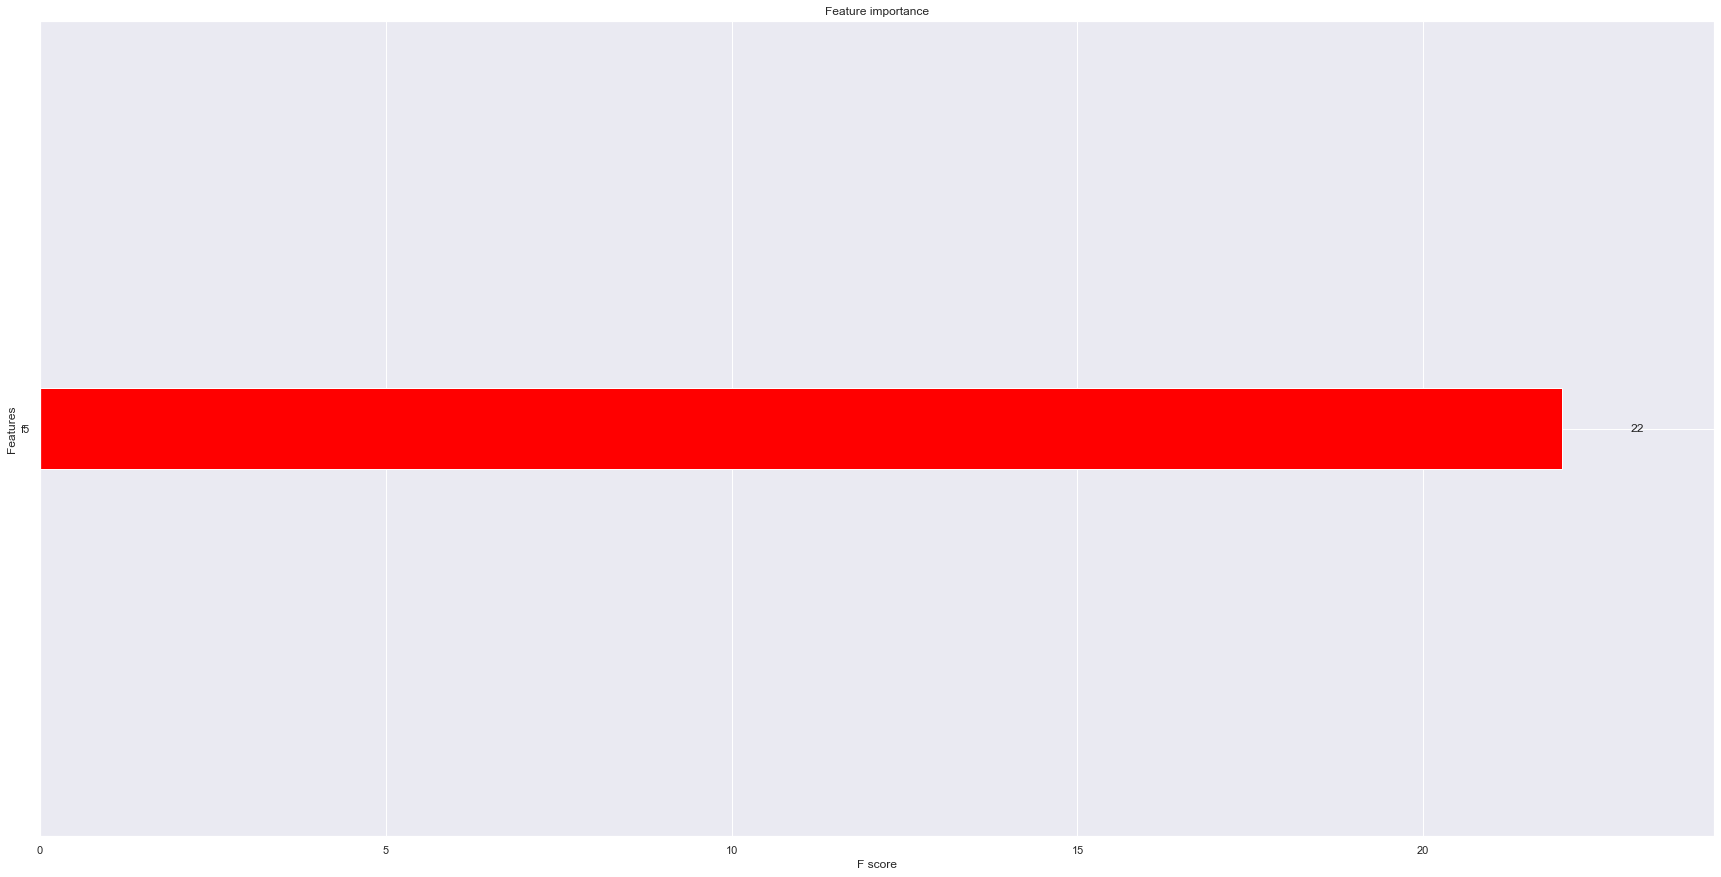

In [33]:
# building the importance plot
ax = plot_importance(g_boost, color='red')
fig = ax.figure
fig.set_size_inches(30, 15)
plt.show()


In [34]:
feature_names = X_train_1.columns


In [35]:

feature = g_boost.feature_importances_
Dic = dict(zip(feature_names,feature))


In [36]:
print('Top features sorted in order are:')

print(feature_names[5])

Top features sorted in order are:
pct_change


Interestingly, the only important column that is claimed to provide most prediction accuracy is considered the Percentage Change. This is inline with the fact that many traders prefer percentage change when calculating rolling averages, [6]. Let's perform chi-square test to test variables' independence hypothesis

In [37]:
from sklearn.feature_selection import chi2
fitting_scaler = MinMaxScaler()
X_train_1_tr1 = X_train_1.copy()
X_train_1_tr1 = fitting_scaler.fit_transform(X_train_1_tr1)
chi_scores = chi2(X_train_1_tr1,y_train_1)
chi_scores


(array([0.44167204, 1.44028383, 1.16359532, 1.82963604, 0.01045091,
        6.37187423, 5.94818359, 5.72357805, 3.76791223, 3.41097276,
        3.00852125, 2.0627969 , 1.21128625, 0.43265664, 0.36732416,
        0.30281962, 0.27843154, 0.07580658, 0.01269798, 0.93674661,
        1.33445505, 0.31154151]),
 array([0.50631653, 0.23009342, 0.28072115, 0.17617054, 0.91857437,
        0.01159431, 0.01473246, 0.01673859, 0.05224481, 0.06476426,
        0.08282782, 0.15093292, 0.27107753, 0.51068825, 0.54446645,
        0.58212015, 0.59773109, 0.78306276, 0.91028004, 0.33311594,
        0.2480142 , 0.57673579]))

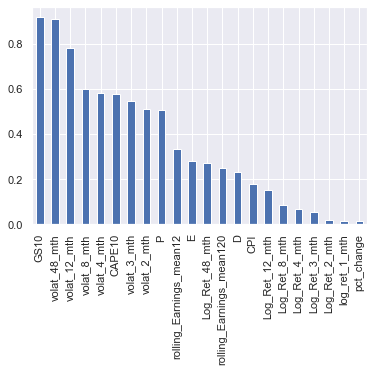

In [38]:
p_values = pd.Series(chi_scores[1],index = X_train_1.columns)
p_values.sort_values(ascending = False , inplace = True)

p_values.plot.bar()

Null Hypothesis (H0): The variables are independent.
Alternative Hypothesis (H1): The variables are not independent.
Here we have 21 category predictors and one category response (direction 'up' or 'down')
Since 'GS10',etc. have highest the p-value, it says that these variables are independent of the response and better not be considered for model training. Before dropring some of them it's better to consider some hyperparameter tuning. The importance of column 'pct_change' is justified again. But the CAPE ratio does not seem to have strong predictive power. Let's run the baseline model on a reduced set of features

In [39]:
%%capture --no-stdout
print('Selecting top 13 features')
X_train_cp = X_train_1.copy()
X_train_less = X_train_cp[['P','rolling_Earnings_mean12','E','Log_Ret_48_mth','rolling_Earnings_mean120',
                           'D','CPI','Log_Ret_12_mth','Log_Ret_8_mth','Log_Ret_4_mth','Log_Ret_3_mth', 
                           'Log_Ret_2_mth','log_ret_1_mth','pct_change']]
# scale features 
X_train_scale = fitting_scaler.fit_transform(X_train_less)

start_time = time.time()
kfold_model_run(lg, X_train_scale, y_train_1)
elapsedtime = time.time() - start_time
print('Time taken to run this model is {} sec'.format(elapsedtime))


Selecting top 13 features
Fold 1: Accuracy: 0.901
Fold 2: Accuracy: 0.913
Fold 3: Accuracy: 0.919
Fold 4: Accuracy: 0.925
Fold 5: Accuracy: 0.888
Fold 6: Accuracy: 0.894
Fold 7: Accuracy: 0.881
Fold 8: Accuracy: 0.881
Fold 9: Accuracy: 0.875
Fold 10: Accuracy: 0.825
Average Score is: 89.021%(2.717%)
Time taken to run this model is 0.14064884185791016 sec


We can observe an average score worsening for about 9%. This could be due to some hidden interconnections between variables as well as not the best set of hyperparameters selected. Also, it is said that the k-fold does not work well for financial time series ,López de Prado [9] , and that walk-forward-cross-validation is considered better (this would be left as an area for future research). For now we'd try to perform hyperparameter tuning and to play on safe side, we'd use the set parameters which performed best on baseline model.

#### Model implementation
In this section weèll implement five different classification algorithms, namely: Logistic Regression, Random Forest, KNN, Gradient boosting and Decision Tree to be performed on the training dataset using 10-fold cross-validation.

In [40]:
# scaling the features 
X_train_1_cp2 = X_train_1.copy()
X_train = fitting_scaler.fit_transform(X_train_1_cp2)

In [41]:
logistic_reg_model = LogisticRegression()
Random_Forest_model = RandomForestClassifier()
knn_model = KNeighborsClassifier(n_neighbors=20)
g_boost = XGBClassifier()
dtree_model = tree.DecisionTreeClassifier(criterion = "entropy",min_samples_leaf = 500)

In [42]:
%%capture --no-stdout
# fit models with training data.
print('Running 10-fold validation on Logistic Regression')
kfold_model_run(logistic_reg_model, X_train, y_train_1)
print('Running 10-fold validation on Decision Tree')
dt = kfold_model_run(dtree_model, X_train, y_train_1)
print('Running 10-fold validation on Random Forest')
kfold_model_run(Random_Forest_model, X_train, y_train_1)
print('Running 10-fold validation on KNN, K = 20')
kfold_model_run(knn_model, X_train, y_train_1)
print('Running 10-fold validation on Gradient Boosting')
kfold_model_run(g_boost, X_train, y_train_1)

Running 10-fold validation on Logistic Regression
Fold 1: Accuracy: 0.913
Fold 2: Accuracy: 0.938
Fold 3: Accuracy: 0.913
Fold 4: Accuracy: 0.919
Fold 5: Accuracy: 0.881
Fold 6: Accuracy: 0.875
Fold 7: Accuracy: 0.881
Fold 8: Accuracy: 0.894
Fold 9: Accuracy: 0.862
Fold 10: Accuracy: 0.856
Average Score is: 89.332%(2.527%)
Running 10-fold validation on Decision Tree
Fold 1: Accuracy: 1.0
Fold 2: Accuracy: 1.0
Fold 3: Accuracy: 1.0
Fold 4: Accuracy: 1.0
Fold 5: Accuracy: 1.0
Fold 6: Accuracy: 1.0
Fold 7: Accuracy: 1.0
Fold 8: Accuracy: 1.0
Fold 9: Accuracy: 1.0
Fold 10: Accuracy: 0.994
Average Score is: 99.938%(0.188%)
Running 10-fold validation on Random Forest
Fold 1: Accuracy: 1.0
Fold 2: Accuracy: 1.0
Fold 3: Accuracy: 1.0
Fold 4: Accuracy: 1.0
Fold 5: Accuracy: 1.0
Fold 6: Accuracy: 1.0
Fold 7: Accuracy: 1.0
Fold 8: Accuracy: 1.0
Fold 9: Accuracy: 1.0
Fold 10: Accuracy: 0.994
Average Score is: 99.938%(0.188%)
Running 10-fold validation on KNN, K = 20
Fold 1: Accuracy: 0.826
Fold 2:

Logistic regression accuracy somehow deteriorated, decision tree, random forest and XGBoost shown good results. But we should not be too excited since decision trees are prone to overfitting and we must see the overall performance on out-of-sample test set

#### Performing Model Tuning 
Goals: 
 - Improve the performance of the models from the previous step and select a final optimal model using grid search (parameter sweep) based on a metric (or metrics) choosen. 
- Selecting performance measures, such as accuracy, true positive rate (TPR), false positive rate (FPR), etc, to compare the model performance and explain why the selected criteria was choosen for best model 

from http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
We are chosing GridSearchCV, a method for tuning the hyperparameters that would result in optimized model selection.

Model selection and evaluation using tools, such as model_selection.GridSearchCV and model_selection.cross_val_score, take a scoring parameter that controls what metric they apply to the estimators evaluated.

Grid search is building several models having all the combinations of parameter in place,. It then runs a defult of three cross validations to return a set of parameters which proved to have highest accuracy score on the validation set based on the chosen accuracy scorer.

GridSearchCV automatically refits the best model using all of the data that best fitted model is stored in grid object 
we can then use prediction using the best fitted model

A search consists of:
-an estimator (regressor or classifier such as RandomForestClassifier(), or LogisticRegression())
-a parameter space
-a method for searching or sampling candidates
-a cross-validation scheme
-a score function, such as accurracy_score()

We used The accuracy_score fuction of defult library to compare the scores across  different hyper-parameters. 
The optimal hyperparameter set is then chosen to run 10-fold cross validation in order to obtain the average score of optimal parameters. It was also used to get the confusion matrix and run-time of all the implemented algorithms. 

On a separate note - other techniques like Random search and more advanced Baesian frameworks are used generally. The latter proven to be one of the most efficient approaches for search in hyperparameter space.

Finally, we selected the model with highest score which has proven to be the Gradient boosting.

In [43]:
### Logistic Regression model hyper-parameter tuning
lg = LogisticRegression(random_state=42)
# Creating hyperparameter search space  and regularization penalty space

penalty = ['l1', 'l2']
# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating hyperparameter options
lg_params = dict(C=C, penalty=penalty)

### Decision Tree model hyper-parameter tuning
dt = tree.DecisionTreeClassifier()

# Choosing some parameter combinations to tune
dt_params = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10, 100,500, 1000],
              "max_leaf_nodes": [None, 5, 10, 20,25],
              }

### Random Forest model hyper-parameter tuning
rf = RandomForestClassifier()

# Choosing some parameter combinations to tune
rf_params = {'n_estimators': [4, 9, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 5, 10,15], 
              'min_samples_split': [2, 3, 5,10],
              'min_samples_leaf': [1,5,8]
             }

### KNN model hyper-parameter tuning
knn = KNeighborsClassifier()
# Choosing some parameter combinations to tune
knn_params = {"n_neighbors": np.arange(5, 35, 4), 
              "metric": ["euclidean", 'minkowski']}

### Gradient boost model hyper-parameter tuning
gboost = XGBClassifier()

# Choosing some parameter combinations to tune
gboost_params = {'gamma': [0.05, 0.1, 0.3, 0.5,1], 
              'max_depth': [3, 5, 9], 
              'subsample': [0.6, 0.8, 0.9, 1]
                }

def run_gridsearch(clf, X, y, hyperparameters, cv=5):
    
    # Using classification accuracy to compare parameter combinations
    acc_scorer = make_scorer(accuracy_score)


    # Creating grid search using k-fold cross-validation
    grid_search = GridSearchCV(clf, hyperparameters, cv=cv, scoring=acc_scorer)
    grid_search = grid_search.fit(X, y)
    
    print('Best Score is:')
    best_score = grid_search.best_score_ 
    print((best_score*100))
    print('Best Model Hyperparameters are:')
    print(grid_search.best_params_)
    print('Best Model fit is:')
    print(grid_search.best_estimator_)
    
    # Setting classifier to utilize the best parameters combination
    best_clf = grid_search.best_estimator_
     
    return best_clf

In [44]:
%%capture --no-stdout
print('Logistic Regression Tuning')
best_lg = run_gridsearch(lg, X_train, y_train_1, lg_params)
print('Decision Tree Tuning')
best_dt = run_gridsearch(dt, X_train, y_train_1, dt_params)
print('Random Forest Tuning')
best_rf = run_gridsearch(rf, X_train, y_train_1, rf_params)
print('KNN Tuning')
best_knn = run_gridsearch(knn, X_train, y_train_1, knn_params)
print('Gradient Boosting Tuning')
best_gboost = run_gridsearch(gboost, X_train, y_train_1, gboost_params)

Logistic Regression Tuning
Best Score is:
98.31619937694704
Best Model Hyperparameters are:
{'C': 10000.0, 'penalty': 'l2'}
Best Model fit is:
LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Decision Tree Tuning
Best Score is:
99.875
Best Model Hyperparameters are:
{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Model fit is:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_wei

As it was envisioned as a possible outcome - Logistic regression's performance is good again on full set of parameters. This is true even when comparing logistic regression results on 10-fold validation for Logistic Regression (88% then vs 98.3% now after tuning). However, the absolute winner seems to be XGboost with 99.875% prediction accuracy on training set. Random forests demonstrated same accuracy (on some runs it is even higher like in case of last run).

In [45]:
# Now we are performing the evaluation of the best performing model once the hyperparameter tuning is made

def model_eval(best_clf, X, y, K=5):
    # Fitting the best model with optimal hyperparameters to the training data. 
    kfold = KFold(n_splits=K)
    kfold.get_n_splits(X)
    
    # calculating the accuracy below
    accuracy = np.zeros(K)
    np_idx = 0
    best_acc = 0
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]

        best_clf.fit(X_train, y_train)

        predictions = best_clf.predict(X_test)

        ACC = accuracy_score(y_test, predictions)
        accuracy[np_idx] = ACC*100
        np_idx += 1

          
        if ACC > best_acc:
            best_acc = ACC
            perform_measure = confusion_matrix(y_test, predictions)
    print("Model {}".format(best_clf))
    print ("The average score is: {}%({}%)".format(round(np.mean(accuracy),3),
                                            round(np.std(accuracy),3)))
    print ('The confussion matrix is:')
    print(perform_measure)
    return True 

In [46]:
%%capture --no-stdout
print('Logistic Regression')
start_time = time.time()
model_eval(best_lg, X_train, y_train_1)
elapsedtime = time.time() - start_time
print('Time taken to run Logistic Regression model is {} sec'.format(elapsedtime))

print('Random Forest')
start_time = time.time()
model_eval(best_rf, X_train, y_train_1)
elapsedtime = time.time() - start_time
print('Time taken to run Random Forest model is {} sec'.format(elapsedtime))

print('K-NN')
start_time = time.time()
model_eval(best_knn, X_train, y_train_1)
elapsedtime = time.time() - start_time
print('Time taken to run KNN model is {} sec'.format(elapsedtime))


print('Gradient Boosting')
start_time = time.time()
model_eval(g_boost, X_train, y_train_1)
elapsedtime = time.time() - start_time
print('Time taken to run Gradient Boosting model is {} sec'.format(elapsedtime))

print('Decision Tree')
start_time = time.time()
model_eval(best_dt, X_train, y_train_1)
elapsedtime = time.time() - start_time
print('Time taken to run Decision Tree model is {} sec'.format(elapsedtime))

Logistic Regression
Model LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
The average score is: 98.066%(1.347%)
The confussion matrix is:
[[130   0]
 [  1 190]]
Time taken to run Logistic Regression model is 0.17057228088378906 sec
Random Forest
Model RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=2, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=F

# Testing of best performing Model

We will try to make a prediciton test dataset for market direction prediction using the most optimal XGBoost model implemented above

We must also answer the question: how the model performs on the test data vs. the train data?
The overall fit of the model, how to increase the accuracy (test, training)? Is it overfitting or underfitting

In order to find answers to these questions we've tried to compare the training and testing accuracy
and found out that the latter is comparable to the training accuracy. Hence, we would be able to conclude whether the model behaves well or not.

In [47]:
%%capture --no-stdout
# obtaining the most optimal model
optimal_model =  best_gboost
X_test_1_cp = X_test_1.copy()

# scaling all the features 
X_test = fitting_scaler.fit_transform(X_test_1_cp)

# training the optimal model on the entire training dataset 
optimal_model.fit(X_train, y_train_1)



Predicting the testing dataset's 'dir' category

In [48]:
predictions = optimal_model.predict(X_test)
ACC = accuracy_score(y_test_1, predictions)
perform_measure = confusion_matrix(y_test_1, predictions)

print("Acuracy Score of the Optimal Model is: {}%".format(round(ACC*100),1))
print ('The Confussion Matrix is:')
print(perform_measure)

Acuracy Score of the Optimal Model is: 68.0%
The Confussion Matrix is:
[[  2  58]
 [  0 119]]


Accuracy of XGBoost dropped to 68.0% on unseen data which is not too bad, but it should be investigated how to improve this result. One of the reasons is the higher imbalance of 'Ups' vs 'Downs' in testing dataset as one can see from results below.

Further thoughts on possible imbalance of sets 

In [49]:
y_train_ups = (y_train_1['dir'] == 1).sum()
print(y_train_ups)

y_trn_ups_pct = y_train_ups / y_train_1['dir'].count().astype(float)
y_trn_ups_pct

895


0.5579800498753117

In [50]:
y_test_ups = (y_test_1['dir'] == 1).sum()
print(y_test_ups)

y_tst_ups_pct = y_test_ups / y_test_1['dir'].count().astype(float)
y_tst_ups_pct

119


0.664804469273743

In the training set the distribution is roughly 56%-44% in favor of “Up”s, and for the test set it is 66%-34% also in favor of “Up”s. Different techniques are in place to do resamplings for imbalanced classes , e.g. SMOTE or recently GAN's. But our imbalance is not really huge and also the GANs is seemingly a heavy machinery which is out of scope of this mini-evaluation. We'd conentrate more on AUC (area under ROC curve), which is said to be not sensitive to imbalances

### Limitations
This model does not account for inflation - consistently defined and longterm running series on U.S. inflation since the 1920’s does not exist and inflation expectations could be modelled as the average of the predicted CPI inflation rate over the next 10 years generated from an AR model at any month in time [10].
Model's behaviour in case of negative interest rates remains a topic for investigation

### Future area of research
Another area of future research could be using partial differencing,  because using standard differencing results in loss of memory for the sake of achieving stationarity, López de Prado[8]

As another state-of-the-art we select LSTM method mainly due to its property to  presere and train the features  of  given  data for  larger timeframes. A notable mention is bidirectional LSTM (BiLSTM) version

### References

[1] _Online Data Robert Shiller_ , weblink: http://www.econ.yale.edu/~shiller/data.htm

[2] Robert J. Shiller, _Irrational Exuberance_ [Princeton University Press 2000, Broadway Books 2001, 2nd ed., 2005] 

[3] Xiaoyue Wang, Abdullah Mueen, Hui Ding, Goce Trajcevski, Peter Scheuermann, and Eamonn Keogh. _Experimental comparison of representation methods and distance measures for time series data_. Data Mining and Knowledge Discovery, 26(2):275–309, 2013.

[4] Merton H. Miller and Kevin Rock, _Dividend Policy under Asymmetric Information_ The Journal of Finance
Vol. 40, No. 4 (Sep., 1985), pp. 1031-1051

[5] Stephen Marra,  _Predicting volatility_ , Lazard Asset Management, weblink: 
https://www.lazardassetmanagement.com/docs/-m0-/22430/predictingvolatility_lazardresearch_en.pdf

[6] _Price Rate Of Change Indicator (ROC)_ , weblink: https://www.investopedia.com/terms/p/pricerateofchange.asp

[7] Chen, K., Zhou, Y., & Dai, F. (2015), _A LSTM-based method for stock returns
prediction: A case study of china stock market_ , in Proceedings of the 2015 IEEE
International Conference on Big Data, pp. 2823–2824.

[8] López de Prado, Marcos, _Ten Financial Applications of Machine Learning (Seminar Slides)_ (June 16, 2018). Available at SSRN: https://ssrn.com/abstract=3197726 or http://dx.doi.org/10.2139/ssrn.3197726

[9] López de Prado, M. (2018), _Advances in Financial Machine Learning_ , New Jersey 2018

[10] Wang, Haifeng and Ahluwalia, Harshdeep and Aliaga-Diaz, Roger A and Davis, Joseph H., _The Best of Both Worlds: Forecasting US Equity Market Returns using a Hybrid Machine Learning – Time Series Approach_ (December 2, 2019). Available at SSRN: https://ssrn.com/abstract=3497170 or http://dx.doi.org/10.2139/ssrn.3497170

[11] R. Nau, _Statistical Forecasting_ weblink: a) https://people.duke.edu/~rnau/Notes_on_nonseasonal_ARIMA_models--Robert_Nau.pdf , 

b) https://people.duke.edu/~rnau/Slides_on_ARIMA_models--Robert_Nau.pdf

[12] weblink: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
